# Lab 3: Masking, BitWise Operators and Histogram - Equalization

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [72]:
# reeading filesa
img_background = cv2.imread("base.png")
img_background = cv2.resize(img_background, (500,500))
img_logo = cv2.imread("logo.png")
img_logo = cv2.resize(img_logo, (175,175))

def show(win_name, img):
    cv2.imshow(win_name, img)
    cv2.waitKey()
    cv2.destroyAllWindows()

show("logo", img_logo)

## Masking and BitWise Operators

In [35]:
# converting logo into grayscale
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)
ret, img_logo_bin = cv2.threshold(img_logo_gray, 220, 255, cv2.THRESH_BINARY)

show("binary logo", img_logo_bin)

In [39]:
# performing bitwise not operator on image
img_logo_bin_not = cv2.bitwise_not(img_logo_bin)
show("binary logo not", img_logo_bin_not)

In [37]:
# bitwise and opertor on background 
rows, cols = img_logo_bin_not.shape
roi = img_background[150: 150 + rows, 150: 150 + cols]

img_back_and_v1 = cv2.bitwise_and(roi, roi, mask=img_logo_bin) # same sized images
show("roi", roi)
show("background img and v1", img_back_and_v1)

In [40]:
# removing background from logo
final_logo = cv2.bitwise_and(img_logo, img_logo, mask=img_logo_bin_not)

show("logo without background", final_logo)

In [48]:
dst = cv2.add(img_back_and_v1, final_logo)

cv2.imshow("img1", img_back_and_v1)
cv2.imshow("img2", final_logo)
cv2.imshow("fusion", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## Histogram - Equalization

In [71]:
back_gray = cv2.cvtColor(img_background, cv2.COLOR_BGR2GRAY)
show("background gray", back_gray)

[   716   5688  28723  39929  47644  55353  64021  73607  83380  92977
 103697 115404 125416 134010 142158 149697 156593 163631 170852 177549
 184102 191422 196854 201832 207711 211753 215762 218461 220605 222271
 223708 225168 226310 227395 228243 229010 229671 230369 231001 231641
 232272 232920 233580 234174 234836 235583 236229 236790 237387 238036
 238660 239290 239814 240364 240859 241317 241700 242037 242334 242591
 242851 243036 243221 243354 243469 243622 243759 243870 243999 244097
 244191 244280 244365 244459 244560 244634 244707 244767 244831 244899
 244970 245036 245104 245166 245221 245276 245329 245380 245446 245506
 245557 245619 245682 245731 245769 245832 245880 245929 245968 246011
 246071 246125 246167 246217 246251 246297 246343 246393 246450 246501
 246562 246619 246665 246739 246799 246868 246913 246956 247017 247069
 247135 247179 247227 247274 247320 247366 247419 247465 247513 247560
 247597 247636 247674 247710 247746 247800 247849 247880 247923 247967
 24801

<IPython.core.display.Javascript object>


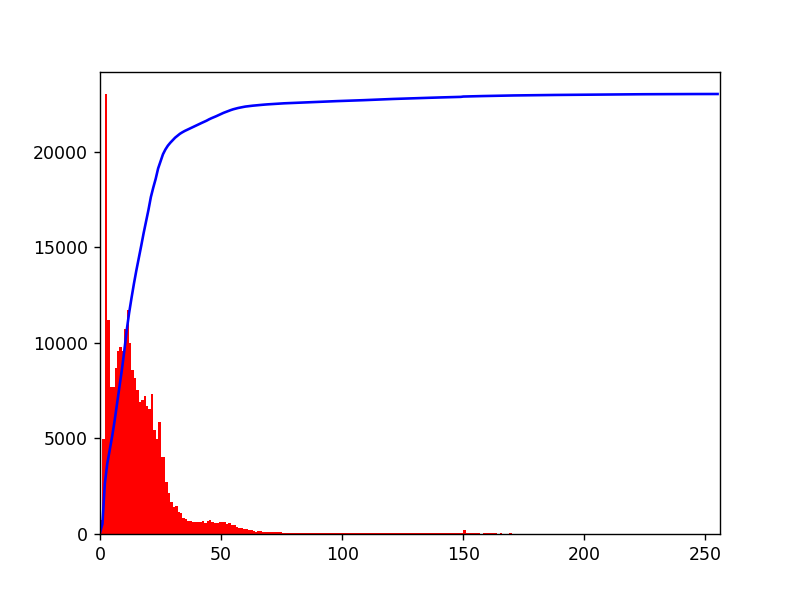

In [75]:
hist, bins = np.histogram(cv2.cvtColor(img_background, cv2.COLOR_BGR2GRAY).flatten(), 256, [0,256])
cdf = hist.cumsum()
print(cdf)

_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color= 'b')
plt.hist(cv2.cvtColor(img_background, cv2.COLOR_BGR2GRAY).flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
# plt.legend(("cdf", 'histogram'), loc = "upper left")
plt.show()

In [76]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [81]:
img = cdf[cv2.cvtColor(img_background, cv2.COLOR_BGR2GRAY)]
cv2.imshow("img original gray", cv2.cvtColor(img_background, cv2.COLOR_BGR2GRAY))
cv2.imshow("img after histgram equilization", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
equ = cv2.equalizeHist(back_gray)
res = np.hstack((back_gray,equ)) #stacking images side-by-side
show("after hist equil", res)